In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("maaslar.csv")
# dataframe
x=data.iloc[:,1:2]
y=data.iloc[:,2:]
# numpy array
X=x.values
Y=y.values

In [3]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=0,n_estimators=10) # 'n_estimators' kaç tane decision tree çizileceğini belirler.
rfr.fit(X,Y.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [4]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [5]:
# linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [6]:
# 4.dereceden Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures
pr2=PolynomialFeatures(degree=4) # veri dağılımına göre derece belirlenebilir.(derece değiştirilip sonuca etkisine bakılabilir.)
x_pr2=pr2.fit_transform(X)
lr3=LinearRegression()
lr3.fit(x_pr2,y)

LinearRegression()

In [7]:
# SVR-rbf
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
y_scaled=np.ravel(sc.fit_transform(Y.reshape(-1,1)))
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_scaled,y_scaled)

SVR()

### Algoritmaların R^2 Değerleri

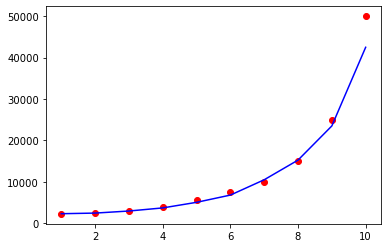

Random Forest Regression R^2:  0.9704434230386582


In [8]:
plt.scatter(X,Y,color='red')
plt.plot(x,rfr.predict(X),color='blue')
plt.show()
from sklearn.metrics import r2_score
print('Random Forest Regression R^2: ',r2_score(Y,rfr.predict(X)))

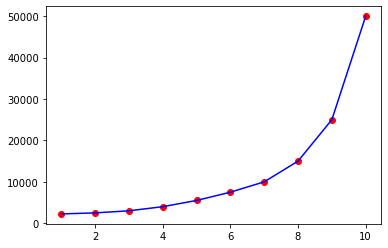

Decision Tree Regression R^2:  1.0


In [9]:
plt.scatter(X,Y,color='red')
plt.plot(x,dtr.predict(X),color='blue')
plt.show()
from sklearn.metrics import r2_score
print('Decision Tree Regression R^2: ',r2_score(Y,dtr.predict(X)))

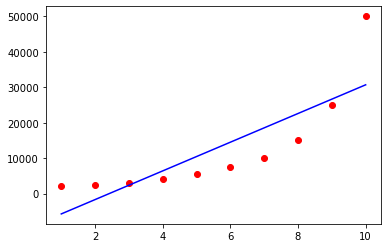

Linear Regression R^2:  0.6690412331929894


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [14]:
plt.scatter(X,Y,color='red')
plt.plot(x,lr.predict(X),color='blue')
plt.show()
from sklearn.metrics import r2_score
print('Linear Regression R^2: ',r2_score(Y,lr.predict(X)))

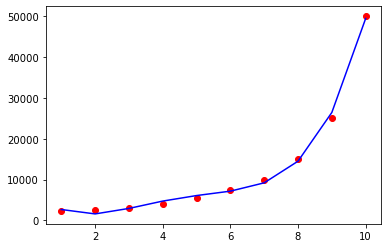

4.dereceden Polynomial Regression  R^2:  0.9973922891706615


In [11]:
plt.scatter(X,y,color='red')
plt.plot(X,lr3.predict(x_pr2),color='blue')
plt.show()
print('4.dereceden Polynomial Regression  R^2: ',r2_score(Y,lr3.predict(x_pr2)))

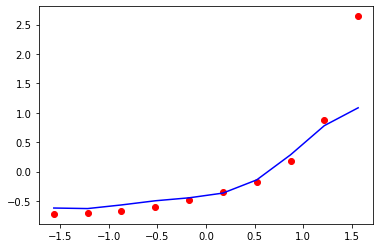

SVR(rbf) R^2:  0.7513836788854973


In [12]:
plt.scatter(x_scaled,y_scaled,color='red')
plt.plot(x_scaled,svr.predict(x_scaled),color='blue')
plt.show()
print('SVR(rbf) R^2: ',r2_score(y_scaled,svr.predict(x_scaled)))